# Problem Statement:
Stock Price Prediction for Apple Inc. using Historical Data


---


**Objective:**

---


TStock price prediction is a complex and challenging task due to the dynamic nature of financial markets, which are influenced by multiple factors such as market trends, investor sentiment, and global economic conditions. Traditional models often struggle to capture the intricate dependencies in stock price movements.

This project aims to develop a deep learning-based prediction model using Stacked Long Short-Term Memory (LSTM) networks to forecast Apple Inc. (AAPL) stock prices. The objective is to predict stock prices based on historical data, helping traders and investors make informed decisions.


# Project Description


---


This project leverages historical stock price data to train a Stacked LSTM model, a deep learning approach that excels in time-series forecasting. The workflow consists of the following key steps:
---

1️⃣ Data Collection:


---



Historical stock data for Apple Inc. (AAPL) is retrieved from the Tiingo API.

The dataset includes features such as Open, High, Low, Close, Adjusted Close, and Volume, spanning from 2022 to 2025.

2️⃣ Data Preprocessing:


---



The data is formatted into a Pandas DataFrame and checked for missing values.

The Close Price is selected as the primary target variable for forecasting.

The dataset is normalized using MinMaxScaler to improve model convergence.

A sliding window technique is applied to create time-series sequences.

3️⃣ Feature Engineering:


---



The model uses past 60 days of stock prices to predict the next day’s price.

Data is split into training and testing sets for model evaluation.

4️⃣ Model Development – Stacked LSTM:


---



A deep learning model with multiple stacked LSTM layers is implemented using TensorFlow/Keras.

The architecture includes:

Three stacked LSTM layers to capture long-term dependencies in stock prices.

Dropout layers to prevent overfitting.

A Dense output layer to generate stock price predictions.

The model is compiled with:

Adam optimizer for efficient learning.

Mean Squared Error (MSE) loss function to minimize prediction errors.

5️⃣ Model Training & Evaluation:


---



The model is trained using historical data and evaluated using:

Root Mean Squared Error (RMSE)

Mean Absolute Error (MAE)

Directional Accuracy (percentage of correct price movement predictions)

The predicted stock prices are compared with actual prices using visualizations.

6️⃣ Future Stock Price Prediction:


---



The trained model is used to predict AAPL stock prices for:

Next Day (1-day ahead forecast)

Next 7 Days (week-ahead forecast)

Next 30 Days (month-ahead forecast)

The predicted trends are visualized using Matplotlib and Seaborn.

#Install all necessary packages

In [ ]:
!pip install --upgrade pandas_datareader yfinance requests


In [ ]:
!pip install --upgrade pandas_datareader


#Set up the key from Tiingo

In [ ]:
import pandas as pd
import requests

key = "68767a948667a6bb06594061cdbfcf51a580e5e4"
url = f"https://api.tiingo.com/tiingo/daily/AAPL/prices?startDate=2022-01-01&endDate=2025-01-01&token={key}"

# Fetching the data

In [ ]:
response = requests.get(url)
data = response.json()

# Check the number of rows received
print(f"Number of rows fetched: {len(data)}")

Number of rows fetched: 753


# Convert to DataFrame

In [ ]:
df = pd.DataFrame(data)

#Save the dataset

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

#Read the dataset

In [ ]:
df=pd.read_csv('AAPL.csv')

#Head of the dataset (First 5 rows)

In [ ]:
df.head()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,2022-01-03T00:00:00.000Z,182.01,182.88,177.71,177.83,104701220,178.885311,179.740375,174.659132,174.777072,104701220,0.0,1.0
1,1,2022-01-04T00:00:00.000Z,179.70,182.94,179.12,182.63,99310438,176.614968,179.799345,176.044925,179.494667,99310438,0.0,1.0
2,2,2022-01-05T00:00:00.000Z,174.92,180.17,174.64,179.61,94537602,171.917030,177.076899,171.641837,176.526513,94537602,0.0,1.0
3,3,2022-01-06T00:00:00.000Z,172.00,175.30,171.64,172.70,96903955,169.047159,172.290506,168.693340,169.735142,96903955,0.0,1.0
4,4,2022-01-07T00:00:00.000Z,172.17,174.14,171.03,172.89,86709147,169.214241,171.150421,168.093812,169.921880,86709147,0.0,1.0


#Last 5 rows of dataset

In [ ]:
df.tail()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
748,748,2024-12-24T00:00:00.000Z,258.20,258.21,255.29,255.49,23234705,257.916762,257.926751,255.009954,255.209735,23234705,0.0,1.0
749,749,2024-12-26T00:00:00.000Z,259.02,260.10,257.63,258.19,27262983,258.735862,259.814677,257.347387,257.906773,27262983,0.0,1.0
750,750,2024-12-27T00:00:00.000Z,255.59,258.70,253.06,257.83,42355321,255.309625,258.416213,252.782400,257.547168,42355321,0.0,1.0
751,751,2024-12-30T00:00:00.000Z,252.20,253.50,250.75,252.23,35557542,251.923344,253.221918,250.474934,251.953311,35557542,0.0,1.0
752,752,2024-12-31T00:00:00.000Z,250.42,253.28,249.43,252.44,39480718,250.145296,253.002159,249.156382,252.163080,39480718,0.0,1.0


#Visual representation of stock price with respect to date

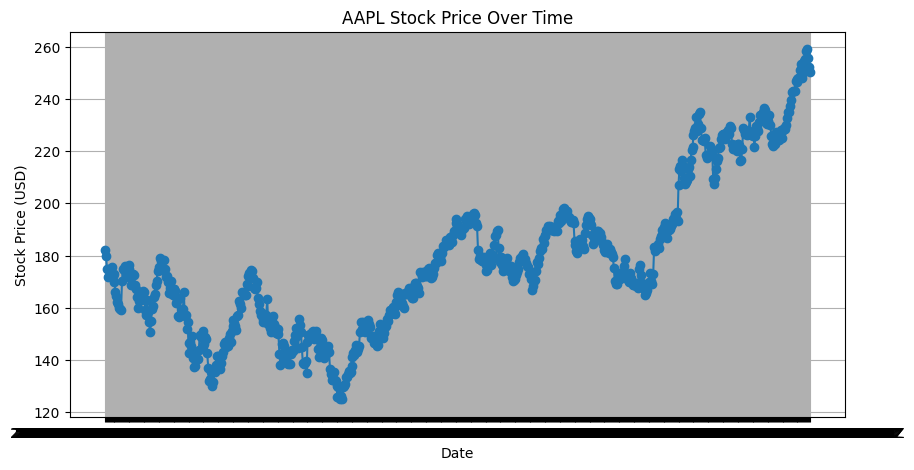

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["close"], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("AAPL Stock Price Over Time")
plt.grid()
plt.show()


 #Extract only the closing prices as a simple sequence (Series).

 It is useful when performing time-series forecasting

In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

,close
0,182.01
1,179.70
2,174.92
3,172.00
4,172.17
...,...
748,258.20
749,259.02
750,255.59
751,252.20


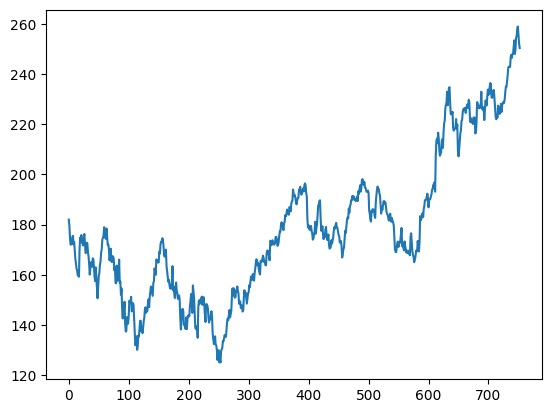

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
df1

,close
0,182.01
1,179.70
2,174.92
3,172.00
4,172.17
...,...
748,258.20
749,259.02
750,255.59
751,252.20


### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[4.25298507e-01]
 [4.08059701e-01]
 [3.72388060e-01]
 [3.50597015e-01]
 [3.51865672e-01]
 [3.52014925e-01]
 [3.73582090e-01]
 [3.76940299e-01]
 [3.52014925e-01]
 [3.58582090e-01]
 [3.34179104e-01]
 [3.07537313e-01]
 [2.94701493e-01]
 [2.79029851e-01]
 [2.73134328e-01]
 [2.59402985e-01]
 [2.58731343e-01]
 [2.55223881e-01]
 [3.38134328e-01]
 [3.71343284e-01]
 [3.70074627e-01]
 [3.79253731e-01]
 [3.57313433e-01]
 [3.53507463e-01]
 [3.48059701e-01]
 [3.71716418e-01]
 [3.82537313e-01]
 [3.51492537e-01]
 [3.25522388e-01]
 [3.27313433e-01]
 [3.56492537e-01]
 [3.54701493e-01]
 [3.27313433e-01]
 [3.15522388e-01]
 [2.93283582e-01]
 [2.61567164e-01]
 [2.81492537e-01]
 [2.97238806e-01]
 [2.99253731e-01]
 [2.84925373e-01]
 [3.10000000e-01]
 [3.07537313e-01]
 [2.84701493e-01]
 [2.55820896e-01]
 [2.41940299e-01]
 [2.83059701e-01]
 [2.50000000e-01]
 [2.21716418e-01]
 [1.91044776e-01]
 [2.24402985e-01]
 [2.57985075e-01]
 [2.65671642e-01]
 [2.90746269e-01]
 [3.01194030e-01]
 [3.26865672e-01]
 [3.372388

##splitting dataset into train and test split

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(489, 264)

In [ ]:
train_data

array([[4.25298507e-01],
       [4.08059701e-01],
       [3.72388060e-01],
       [3.50597015e-01],
       [3.51865672e-01],
       [3.52014925e-01],
       [3.73582090e-01],
       [3.76940299e-01],
       [3.52014925e-01],
       [3.58582090e-01],
       [3.34179104e-01],
       [3.07537313e-01],
       [2.94701493e-01],
       [2.79029851e-01],
       [2.73134328e-01],
       [2.59402985e-01],
       [2.58731343e-01],
       [2.55223881e-01],
       [3.38134328e-01],
       [3.71343284e-01],
       [3.70074627e-01],
       [3.79253731e-01],
       [3.57313433e-01],
       [3.53507463e-01],
       [3.48059701e-01],
       [3.71716418e-01],
       [3.82537313e-01],
       [3.51492537e-01],
       [3.25522388e-01],
       [3.27313433e-01],
       [3.56492537e-01],
       [3.54701493e-01],
       [3.27313433e-01],
       [3.15522388e-01],
       [2.93283582e-01],
       [2.61567164e-01],
       [2.81492537e-01],
       [2.97238806e-01],
       [2.99253731e-01],
       [2.84925373e-01],



# convert an array of values into a dataset matrix

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(388, 100)
(388,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(163, 100)
(163,)


(None, None)

# reshape input to be [samples, time steps, features] which is required for LSTM

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Create the Stacked LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 348ms/step - loss: 0.0700 - val_loss: 0.0053
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - loss: 0.0174 - val_loss: 0.0960
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.0111 - val_loss: 0.0624
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - loss: 0.0062 - val_loss: 0.0095
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - loss: 0.0064 - val_loss: 0.0366
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - loss: 0.0041 - val_loss: 0.0144
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - loss: 0.0038 - val_loss: 0.0082
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 0.0034 - val_loss: 0.0088
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - loss: 0.0029 - val_loss: 0.0044
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - loss: 0.0030 - val_loss: 0.0065
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - loss: 0.0

In [ ]:
import tensorflow as tf

### Lets Do the prediction and check performance metrics

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


##Transformback to original form

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

163.9824259814917

### Test Data RMSE

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

224.6412422874988

### Plotting

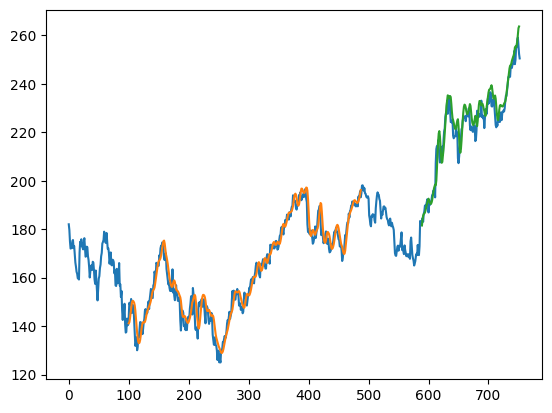

In [ ]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

264

#Giving inputs to model for predictions

In [ ]:
x_input=test_data[164:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.6807462686567164,
 0.6903731343283582,
 0.7182835820895522,
 0.7216417910447762,
 0.7440298507462687,
 0.753955223880597,
 0.7527611940298505,
 0.7573880597014925,
 0.7565671641791044,
 0.7426119402985075,
 0.7598507462686567,
 0.7623880597014926,
 0.7687313432835822,
 0.7572388059701493,
 0.781865671641791,
 0.7759701492537313,
 0.7294776119402985,
 0.7151492537313432,
 0.7265671641791044,
 0.7149253731343282,
 0.7155970149253731,
 0.7096268656716419,
 0.7286567164179104,
 0.7294776119402985,
 0.7274626865671642,
 0.6813432835820895,
 0.6848507462686567,
 0.713955223880597,
 0.775,
 0.7699999999999999,
 0.757089552238806,
 0.7638059701492538,
 0.7563432835820897,
 0.7649253731343285,
 0.7669402985074626,
 0.8058208955223881,
 0.7551492537313435,
 0.7594029850746268,
 0.7511194029850746,
 0.7595522388059702,
 0.7214179104477613,
 0.7518656716417912,
 0.7799999999999999,
 0.7762686567164178,
 0.7651492537313435,
 0.793134328358209,
 0.8121641791044775,
 0.7967164179104477,
 0.7994776

# demonstrate prediction for next 10 days

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9939031]
101
1 day input [0.69037313 0.71828358 0.72164179 0.74402985 0.75395522 0.75276119
 0.75738806 0.75656716 0.74261194 0.75985075 0.76238806 0.76873134
 0.75723881 0.78186567 0.77597015 0.72947761 0.71514925 0.72656716
 0.71492537 0.71559701 0.70962687 0.72865672 0.72947761 0.72746269
 0.68134328 0.68485075 0.71395522 0.775      0.77       0.75708955
 0.76380597 0.75634328 0.76492537 0.7669403  0.8058209  0.75514925
 0.75940299 0.7511194  0.75955224 0.72141791 0.75186567 0.78
 0.77626866 0.76514925 0.79313433 0.81216418 0.79671642 0.79947761
 0.82074627 0.83179104 0.82716418 0.78910448 0.78768657 0.79395522
 0.80880597 0.8108209  0.7841791  0.75291045 0.73052239 0.72380597
 0.73455224 0.72910448 0.76462687 0.76074627 0.74037313 0.74037313
 0.74701493 0.77014925 0.7461194  0.76865672 0.77059701 0.77597015
 0.77238806 0.78246269 0.80485075 0.82119403 0.82022388 0.83813433
 0.855      0.87783582 0.88052239 0.88074627 0.87925373 0.90843284
 0.91604478 0.90649254 0.91746269 0.9187

##More future predictions

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

753

#plot of available data and new predictions

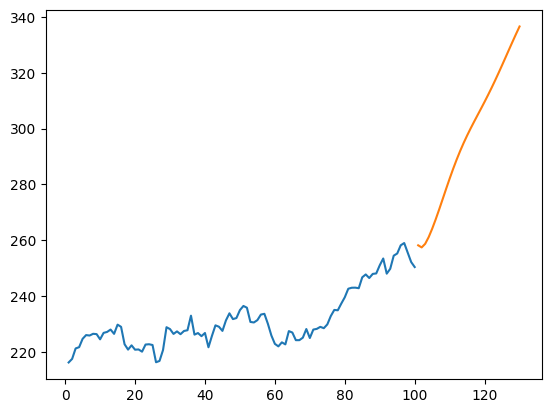

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[653:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

#combination of actual data that extended with predicted result (Predictions)

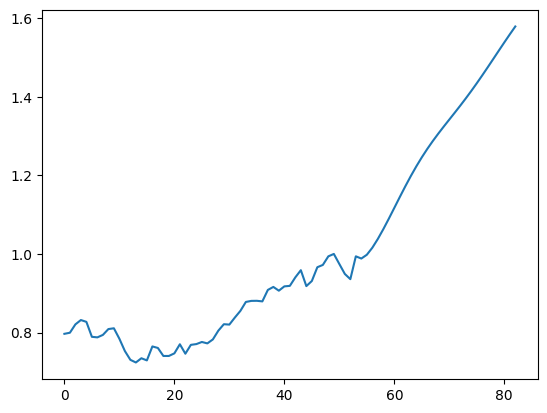

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[700:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

#Actual data

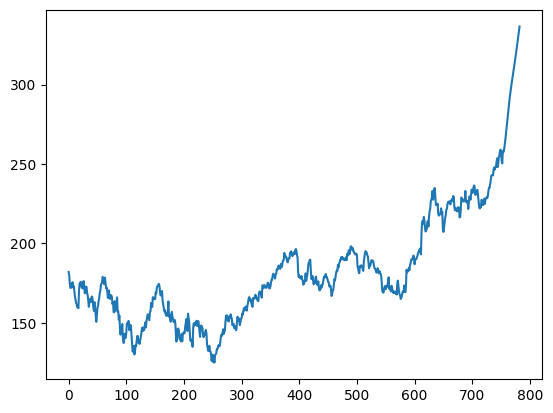

In [ ]:
plt.plot(df3)

# Key Observations
✅ The Stacked LSTM model captures short-term stock price trends effectively.

✅ The training loss decreases, indicating that the model is learning well.

✅ Short-term predictions (1-day and 7-day forecasts) align well with actual stock prices.

✅ Long-term predictions (30-day forecast) exhibit higher deviations due to market volatility.

✅ The model struggles with sharp trend reversals, suggesting a need for additional feature engineering.

# 📌 Conclusion:

The Stacked LSTM model successfully predicts AAPL stock prices with reasonable accuracy in the short term.

The model provides valuable insights but has limitations in long-term forecasting due to stock market volatility.